# E9 241 Digital Image Processing - Assignment 2
***
*Submitted by: Dwaipayan Haldar*<br>
*S.R. No. : 27128*

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

from src.P01_spatial_filter import *
from src.P02_geometric_operation import *
from src.P03_sharpening_filter import *

## Problem 1: Spatial Filtering and Binarization

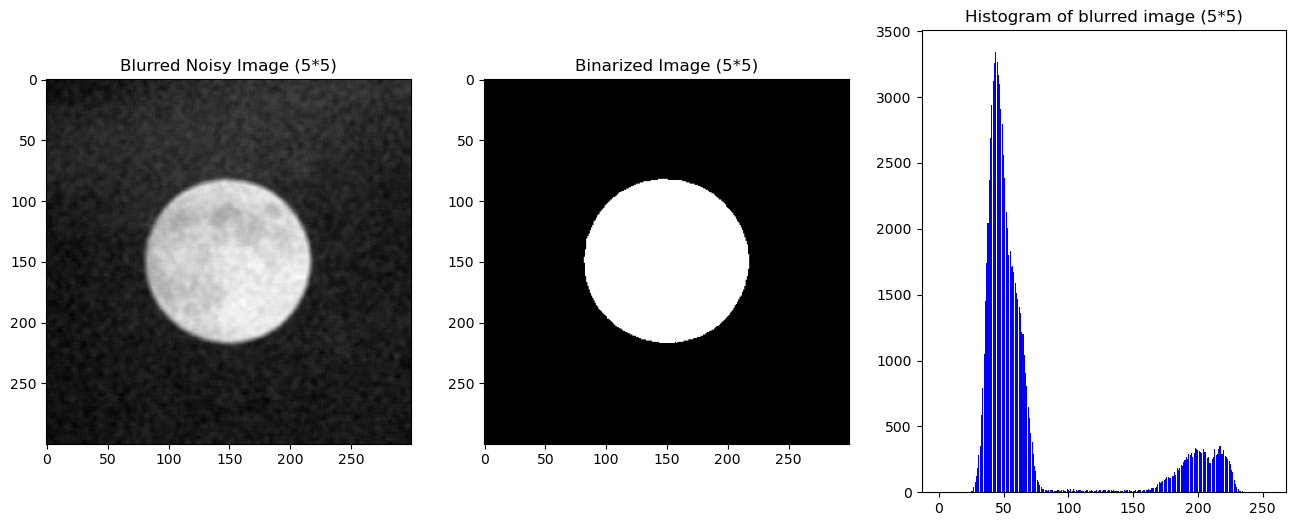

The optimal within class variance is: 158.0067515348846
Optimal Threshold:125


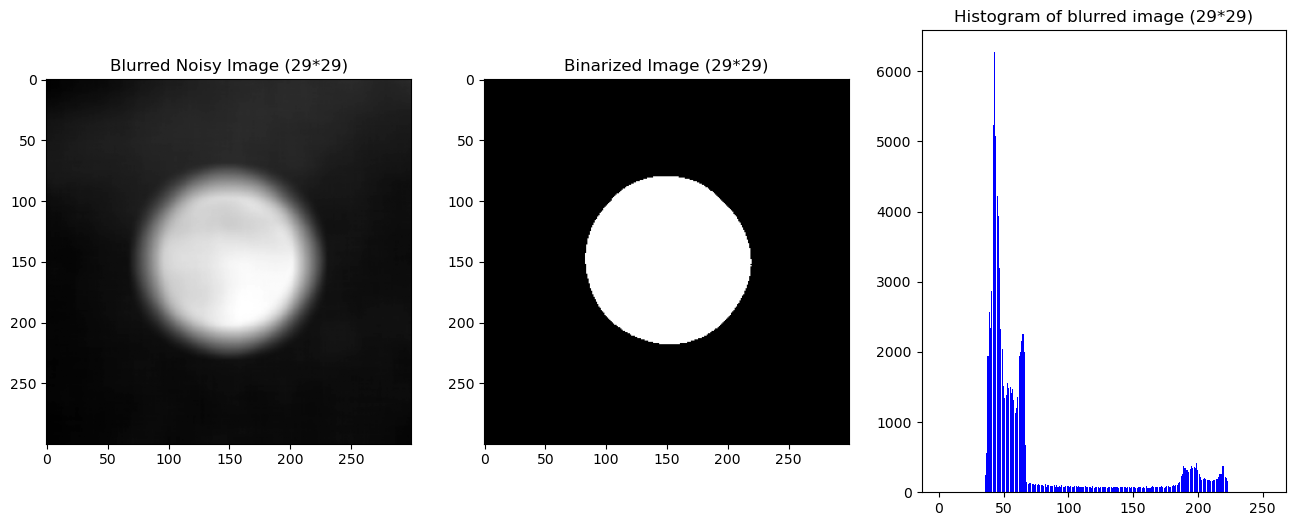

The optimal within class variance is: 279.3946591736916
Optimal Threshold:119


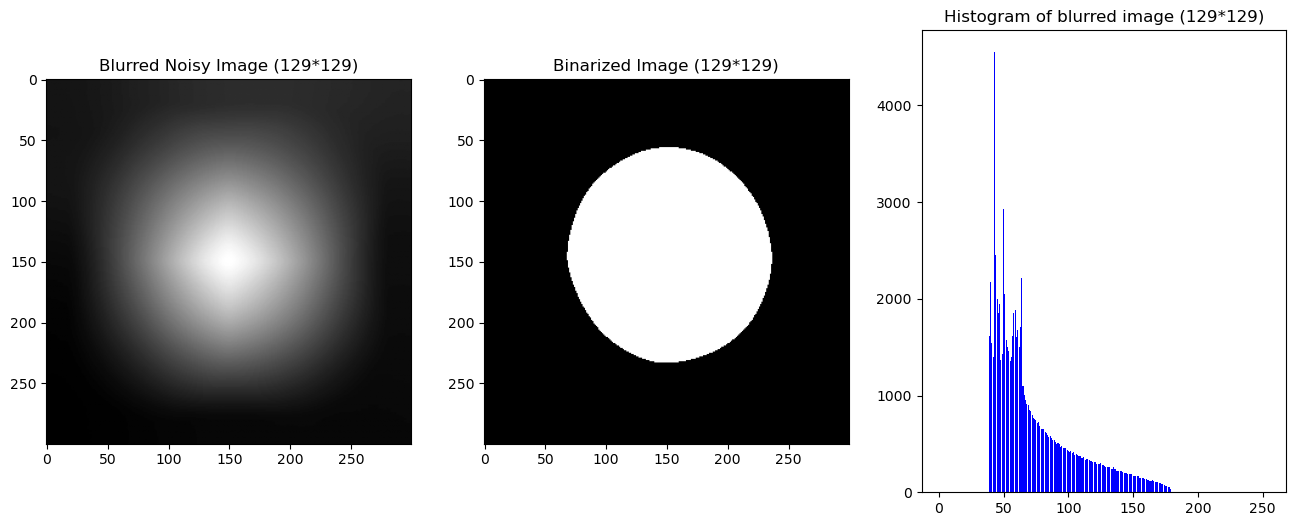

The optimal within class variance is: 268.89033785151594
Optimal Threshold:89


In [2]:
img = skimage.io.imread('images/moon_noisy.png')
img_gray = skimage.color.rgb2gray(img)
img_gray = (img_gray*255).astype(np.uint8)

def plt_binarized_image(box_size):
    kernel = box_kernel(box_size)

    convolved_img = convolve(img_gray, kernel)
    binarized_img, opt_wthn_variance, thresh = otsu_within_class(convolved_img)

    plt.figure(figsize=(16,6))
    plt.subplot(1,3,1)
    plt.title(f'Blurred Noisy Image ({box_size}*{box_size})')
    plt.imshow(convolved_img, cmap='gray')
    plt.subplot(1,3,2)
    plt.title(f'Binarized Image ({box_size}*{box_size})')
    plt.imshow(binarized_img, cmap='gray')
    plt.subplot(1,3,3)
    plt.title(f'Histogram of blurred image ({box_size}*{box_size})')
    plt.bar(range(256), histogram(convolved_img), color = 'blue')
    plt.show()

    print(f'The optimal within class variance is: {opt_wthn_variance}')
    print(f'Optimal Threshold:{thresh}')

for box_size in [5,29,129]:
    plt_binarized_image(box_size)


## Problem 2: Scaling and Rotation with Interpolation

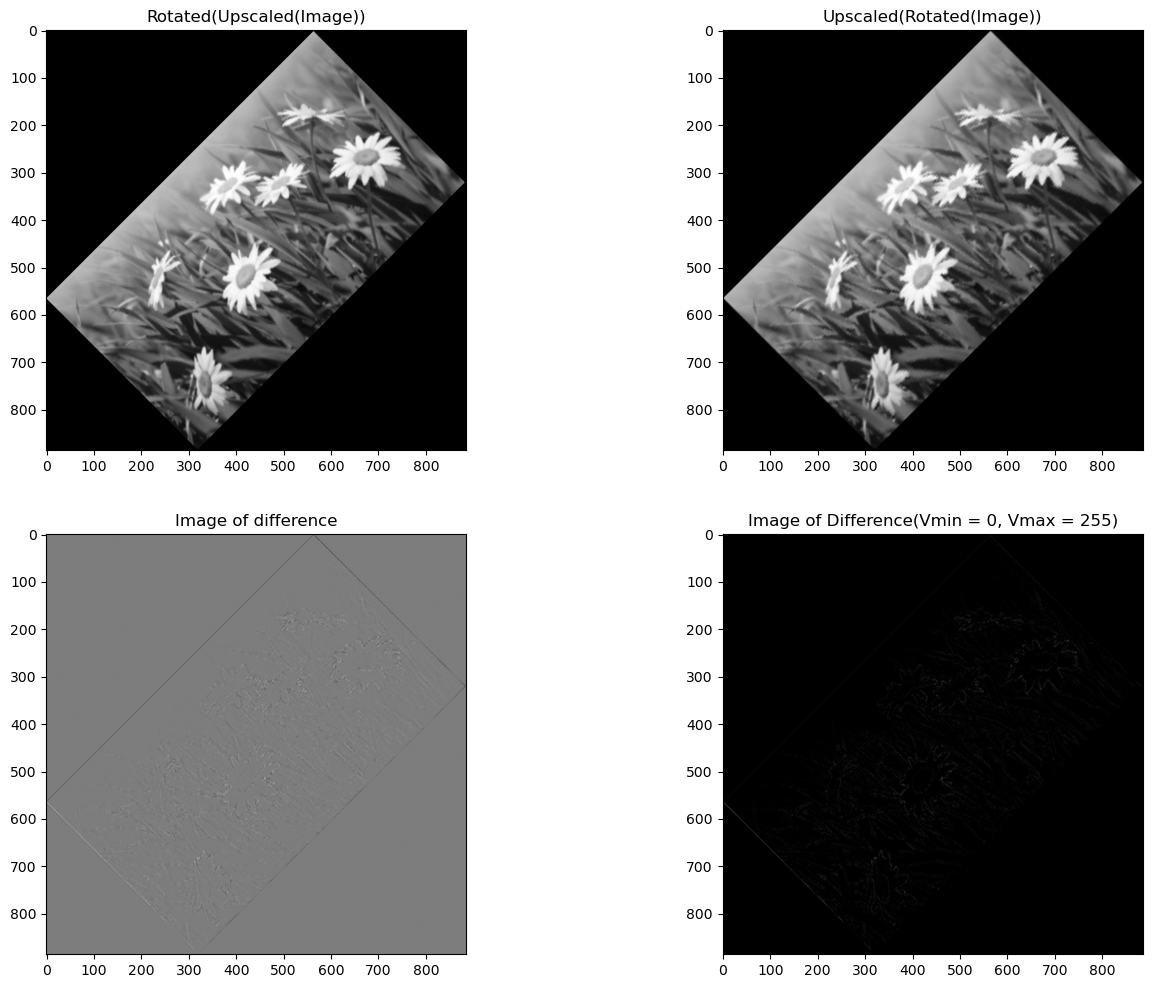

The max value of diff: 178.64503536801993. The min value of diff: -172.23053556529976.


In [30]:
img_flowers = skimage.io.imread('images/flowers.png')
upscaled_img = upscale(img_flowers)
rotated_upscaled_image = rotate_image(upscaled_img, np.pi/4)

rotated_image = rotate_image(img_flowers, np.pi/4)
upscaled_rotated_image = upscale(rotated_image)

diff = rotated_upscaled_image - upscaled_rotated_image

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.title('Rotated(Upscaled(Image))')
plt.imshow(rotated_upscaled_image, cmap = 'gray')
plt.subplot(2,2,2)
plt.title('Upscaled(Rotated(Image))')
plt.imshow(upscaled_rotated_image, cmap = 'gray')
plt.subplot(2,2,3)
plt.title('Image of difference')
plt.imshow(diff, cmap = 'gray')
plt.subplot(2,2,4)
plt.title('Image of Difference(Vmin = 0, Vmax = 255)')
plt.imshow(diff, vmin=0, vmax=255, cmap='gray')
plt.show()

print(f'The max value of diff: {np.max(diff)}. The min value of diff: {np.min(diff)}.')

## Problem 3: Image Sharpening Concept

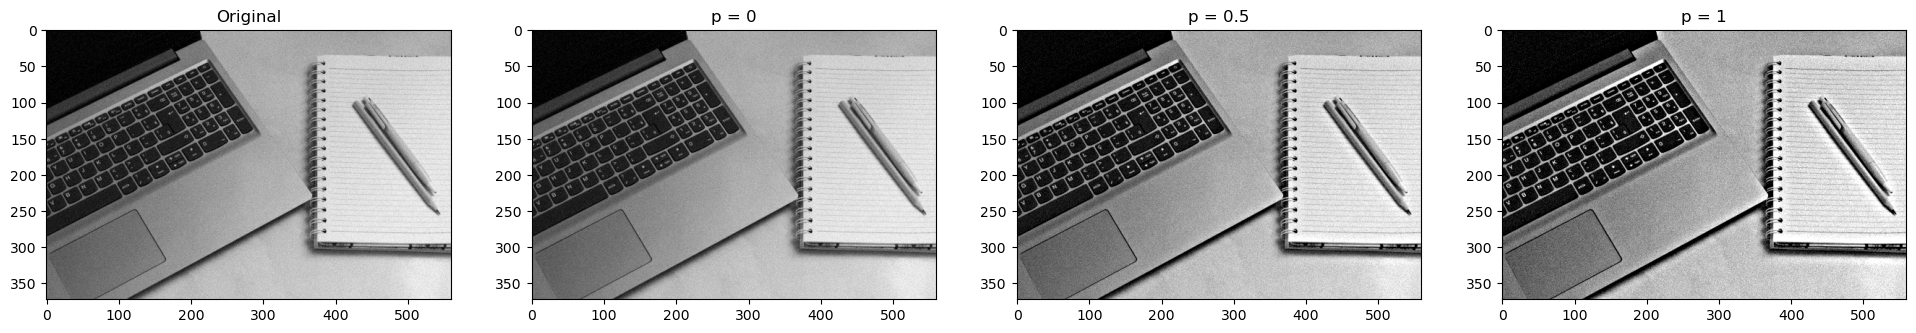

In [ ]:
img_study = skimage.io.imread('images/study.png')
img_study = img_study.astype(np.float64)
final_image_dict = {} 

for p in [0,0.5,1]:
    final_image = sharpenAdjust(img_study, p)
    final_image_dict[p] = final_image.copy()


plt.figure(figsize=(24,12))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(img_study.astype(np.uint8), cmap = 'gray')
plt.subplot(1,4,2)
plt.title('p = 0')
plt.imshow(final_image_dict[0].astype(np.uint8), cmap = 'gray')
plt.subplot(1,4,3)
plt.title('p = 0.5')
plt.imshow(final_image_dict[0.5].astype(np.uint8), cmap = 'gray')
plt.subplot(1,4,4)
plt.title('p = 1')
plt.imshow(final_image_dict[1].astype(np.uint8), cmap = 'gray')
plt.show()

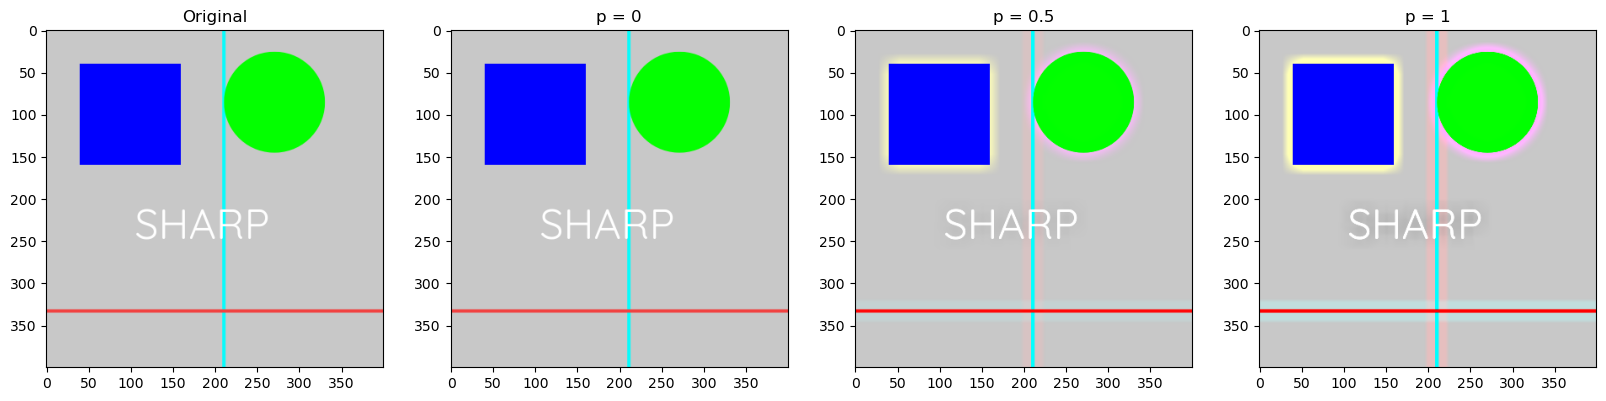

In [4]:
img_sharp = skimage.io.imread('images/Sharp_Image.png')
img_sharp = img_sharp[:,:,:3].astype(np.float64)
final_img = np.zeros_like(img_sharp)
final_image_dict = {} 

for p in [0,0.5,1]:
    for i in range(3):
        final_img[:,:,i] = sharpenAdjust(img_sharp[:,:,i], p)
    final_image_dict[p] = final_img.copy()

plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(img_sharp.astype(np.uint8))
plt.subplot(1,4,2)
plt.title('p = 0')
plt.imshow(final_image_dict[0].astype(np.uint8))
plt.subplot(1,4,3)
plt.title('p = 0.5')
plt.imshow(final_image_dict[0.5].astype(np.uint8))
plt.subplot(1,4,4)
plt.title('p = 1')
plt.imshow(final_image_dict[1].astype(np.uint8))
plt.show()

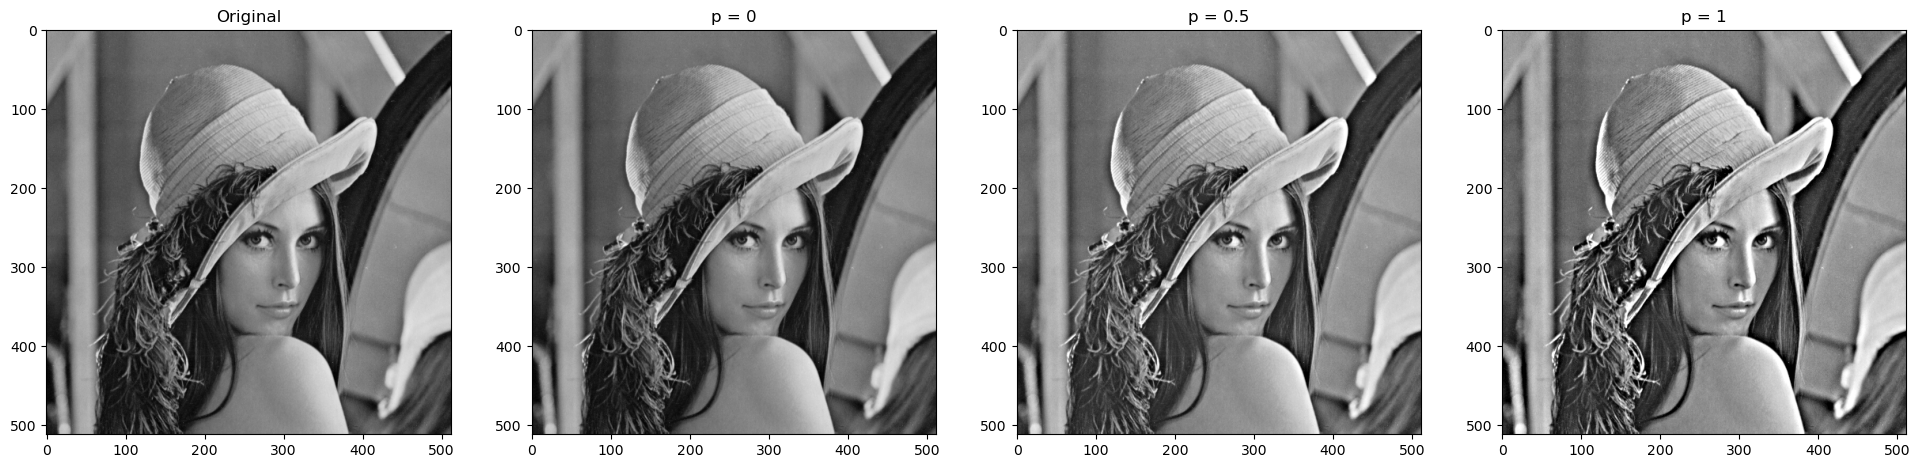

In [15]:
lena = skimage.io.imread('images/lena_gray.png')
lena = lena[:,:,1]
lena = lena.astype(np.float64)
final_image_dict = {} 

for p in [0,0.5,1]:
    final_image = sharpenAdjust(lena, p)
    final_image_dict[p] = final_image.copy()


plt.figure(figsize=(24,12))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(lena.astype(np.uint8), cmap = 'gray')
plt.subplot(1,4,2)
plt.title('p = 0')
plt.imshow(final_image_dict[0].astype(np.uint8), cmap = 'gray')
plt.subplot(1,4,3)
plt.title('p = 0.5')
plt.imshow(final_image_dict[0.5].astype(np.uint8), cmap = 'gray')
plt.subplot(1,4,4)
plt.title('p = 1')
plt.imshow(final_image_dict[1].astype(np.uint8), cmap = 'gray')
plt.show()

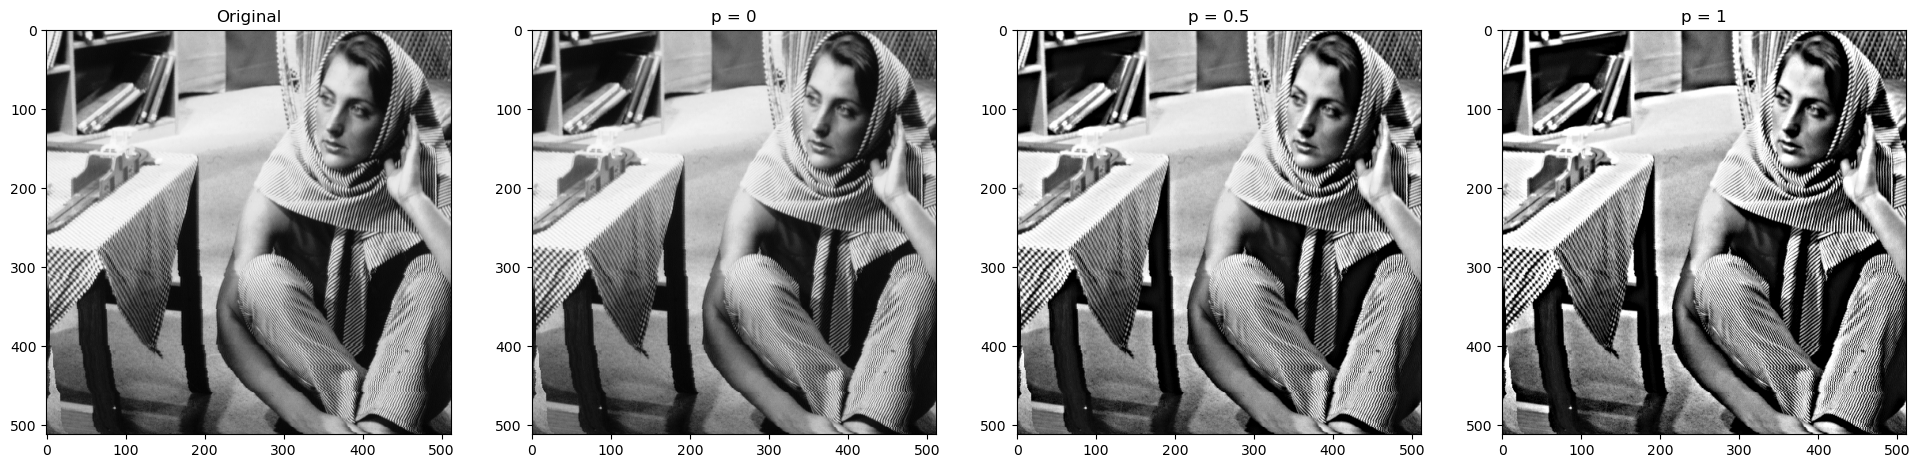

In [16]:
barbara = skimage.io.imread('images/barbara_gray.png')
barbara = barbara[:,:,1]
barbara = barbara.astype(np.float64)
final_image_dict = {} 

for p in [0,0.5,1]:
    final_image = sharpenAdjust(barbara, p)
    final_image_dict[p] = final_image.copy()


plt.figure(figsize=(24,12))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(barbara.astype(np.uint8), cmap = 'gray')
plt.subplot(1,4,2)
plt.title('p = 0')
plt.imshow(final_image_dict[0].astype(np.uint8), cmap = 'gray')
plt.subplot(1,4,3)
plt.title('p = 0.5')
plt.imshow(final_image_dict[0.5].astype(np.uint8), cmap = 'gray')
plt.subplot(1,4,4)
plt.title('p = 1')
plt.imshow(final_image_dict[1].astype(np.uint8), cmap = 'gray')
plt.show()